In [1]:
%matplotlib widget

In [69]:
import os
import fcGMM as gmm
import matplotlib.pyplot as plt
import numpy as np
import fcsparser
import pandas as pd

# Check if the fcs files are in the data folder

List the files in the data folder, you should see the fcs files you want to analyze.

In [94]:
%ls data

 Il volume nell'unit… C non ha etichetta.
 Numero di serie del volume: D85F-3124

 Directory di C:\Users\g_gos\Code\fcGMM\data

06/08/2024  17:13    <DIR>          .
06/08/2024  17:13    <DIR>          ..
06/08/2024  17:03           273.015 29112021 high FSC_T 1 Day 1 pm.fcs
               1 File        273.015 byte
               2 Directory  698.332.135.424 byte disponibili


# Check the config file

In [95]:
%ls *.dat

 Il volume nell'unit… C non ha etichetta.
 Numero di serie del volume: D85F-3124

 Directory di C:\Users\g_gos\Code\fcGMM

06/08/2024  17:14                45 dataCTV.dat
               1 File             45 byte
               0 Directory  698.332.069.888 byte disponibili


In [96]:
!more dataCTV.dat

data/
0:29112021 high FSC_T 1 Day 1 pm.fcs


In [97]:
dataDir = 'data/'
fcsFileName = '29112021 high FSC_T 1 Day 1 pm.fcs'

# channel names
xlabel = 'V450-A'
ylabel = None
zlabel = None

# set dimensions for gmm
dim = 1

# Run gatting strategy

The gate parameters should be adjusted for your specific gatting strategy

In [73]:
# gate paramenters
th = 10**-11 #kernel density th
fsca_lb = 47000
fsca_hb = 250000
ssca_lb = 5000
ssca_hb = 250000

data keys  <bound method NDFrame.keys of               FSC-A         SSC-A      APC-A         PE-A       FITC-A  \
0      68780.039062  23023.439453 -54.939999   213.279999   252.559998   
1     133598.125000  47530.558594  18.039999   852.260010   748.000000   
2     114792.500000  36447.839844 -23.780001   558.140015   557.039978   
3     121767.000000  38932.960938  27.879999   766.260010   699.599976   
4     116047.539062  45587.519531 -23.780001   734.440002   587.840027   
...             ...           ...        ...          ...          ...   
9673   96151.164062  32327.679688 -33.619999   477.300018   564.080017   
9674  134933.828125  59817.121094  24.600000  1195.400024  1100.000000   
9675  103223.343750  36109.917969  49.200001   702.619995   644.159973   
9676  115189.882812  49158.558594  31.160000   831.619995   826.320007   
9677  115716.023438  42074.558594 -13.940000   540.080017   723.359985   

            V450-A          Time  
0      6410.669922      1.600000  


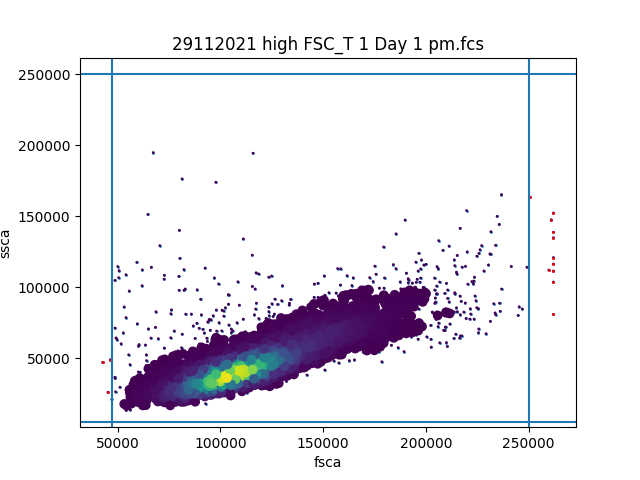

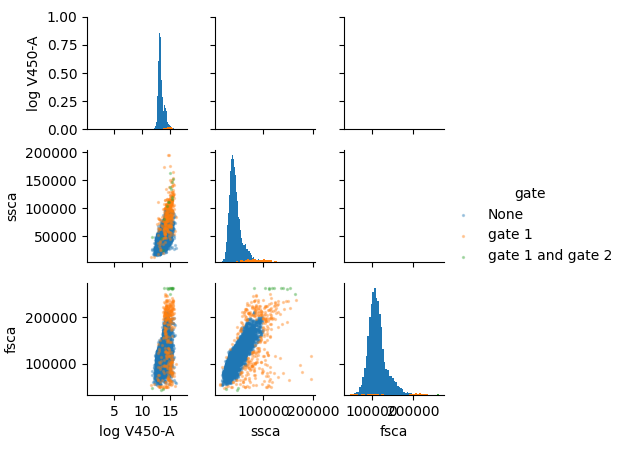

In [74]:
meta, data = fcsparser.parse(dataDir+fcsFileName, meta_data_only=False, reformat_meta=True)
print('data keys ',data.keys)

x,y,z,data = gmm.removeZeros(data,xlabel,ylabel,zlabel)
ssca = data['SSC-A']
fsca = data['FSC-A']

hss,hfs = ssca_hb, fsca_hb
lss,lfs = ssca_lb , fsca_lb
gate1 = (fsca<lfs)|(fsca>hfs)
gate2 = (ssca<lss)|(ssca>hss)

xx, yy,f,kernel = gmm.getKernel(fsca,ssca)

th = th
v = -np.log10(th)

fig, ax = plt.subplots(1,1)
#plt.subplots_adjust(left=0.15, bottom=0.35)
xy = np.vstack([fsca,ssca])
valK = kernel(xy)
ax.scatter(fsca,ssca,s=1)
ax.set_xlabel('fsca')
ax.set_ylabel('ssca')
ax.scatter(fsca,ssca,c=valK,s=1)
ax.scatter(fsca[valK>th],ssca[valK>th],c=valK[valK>th])
ax.scatter(fsca[gate1],ssca[gate1],c='red',s=1)
ax.scatter(fsca[gate2],ssca[gate2],c='yellow',s=1)
ax.axvline(fsca_hb)
ax.axvline(fsca_lb)
ax.axhline(ssca_hb)
ax.axhline(ssca_lb)
ax.set_title(fcsFileName)

gateTh = (valK<th)
graph,dfTh = gmm.prepData(x,y,z,ssca,fsca,gateTh,gate1,gate2,None,xlabel,ylabel,zlabel)

In [88]:
dfTh

,log V450-A,ssca,fsca,gate
0,12.646259,23023.439453,68780.039062,None
1,13.935247,47530.558594,133598.125000,None
2,13.466461,36447.839844,114792.500000,None
3,13.371036,38932.960938,121767.000000,None
4,13.000393,45587.519531,116047.539062,None
...,...,...,...,...
9673,13.138224,32327.679688,96151.164062,None
9674,14.993010,59817.121094,134933.828125,None
9675,13.235688,36109.917969,103223.343750,None
9676,13.071326,49158.558594,115189.882812,None


In [89]:
x

0       12.646259
1       13.935247
2       13.466461
3       13.371036
4       13.000393
          ...    
9673    13.138224
9674    14.993010
9675    13.235688
9676    13.071326
9677    13.021084
Name: log V450-A, Length: 9346, dtype: float32

# Run Gaussian Mixture

<Axes: title={'center': '24h 9346 events'}, ylabel='log V450-A'>

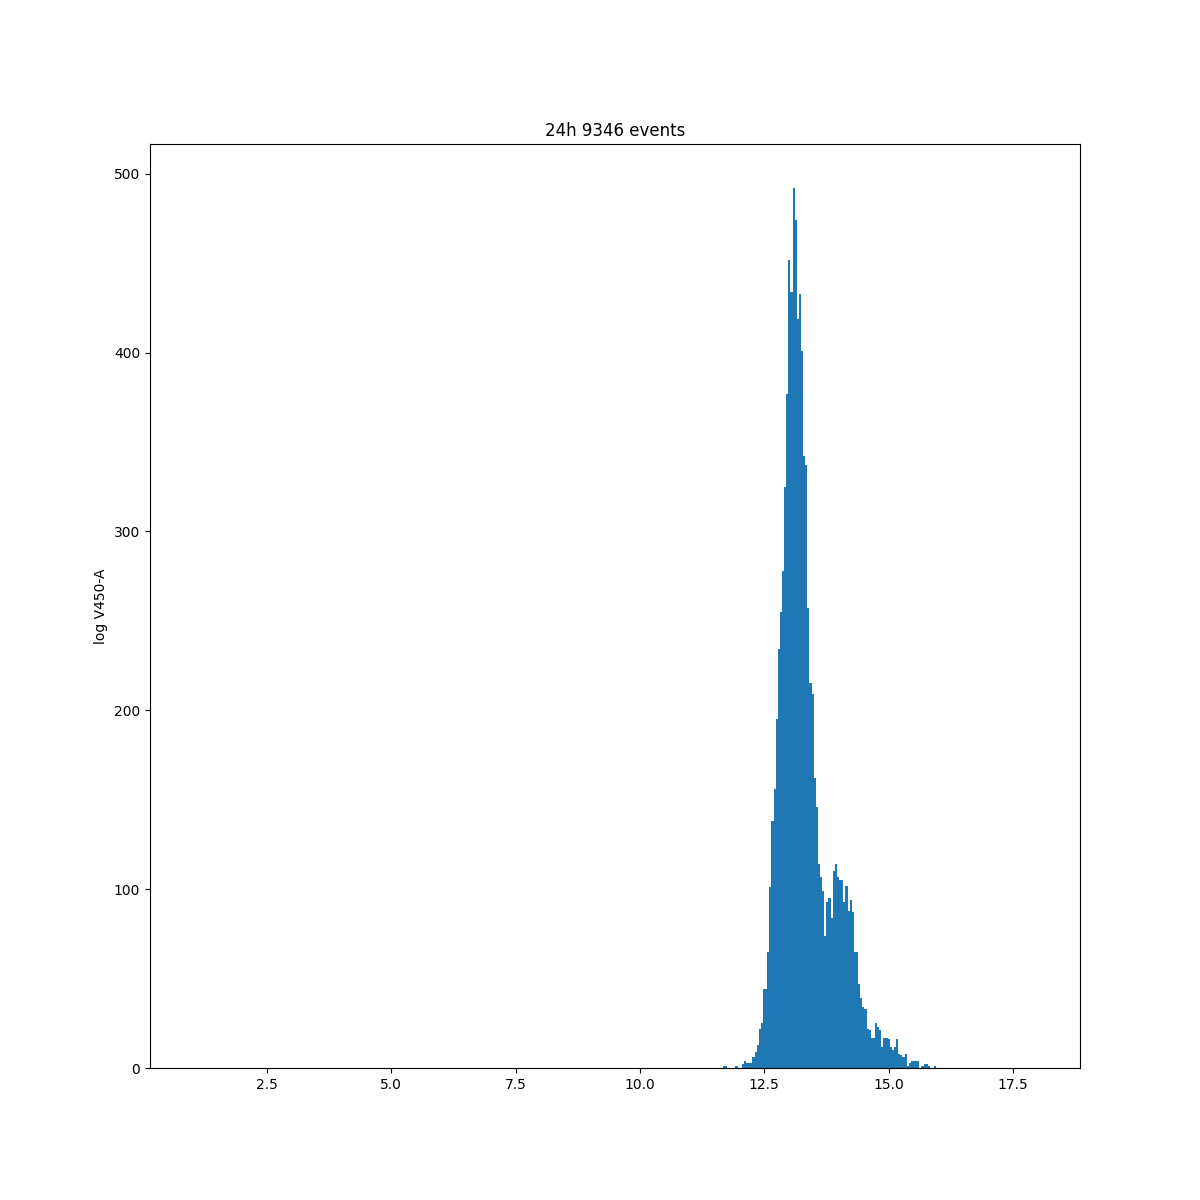

In [80]:
lx = 'log '+xlabel # V450-A'
ly = None
lz = None

time = '24h '

df,x = gmm.getCols(dfTh,lx,ly,lz)
gmm.plot1dlog(x, time, llim=1, lim = 18, xlabel=lx, nbins = 400.0)

In [77]:
res0 = pd.DataFrame( {'means 0':[15.1],'Cs V450-A 0':[0.13],
                      'means 1':[14.3],'Cs V450-A 1':[0.05],
                      'means 2':[13.4],'Cs V450-A 2':[0.08]})

print(res0)

   means 0  Cs V450-A 0  means 1  Cs V450-A 1  means 2  Cs V450-A 2
0     15.1         0.13     14.3         0.05     13.4         0.08


init means [15.1, 14.3, 13.4]
init Cs [0.13, 0.05, 0.08]
k,d 0 0
k,d 1 0
k,d 2 0
------result --------
means [14.77159581 14.05002192 13.11377581]
Cs [0.16416973591610226, 0.0617290199938935, 0.0794813112866021]
outf True  figure labels  V450-A None None
outf True
outf True


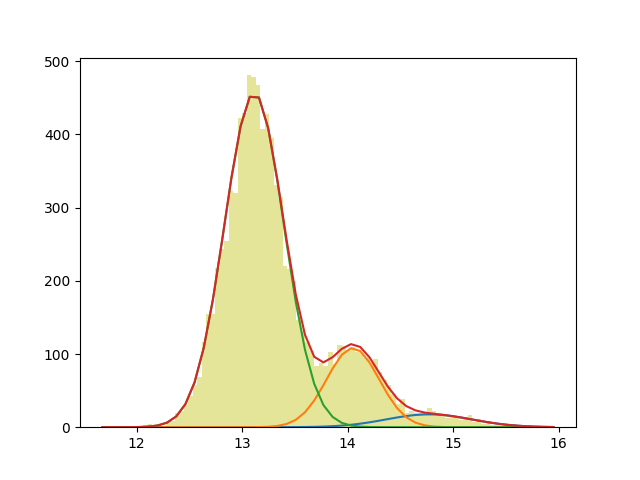

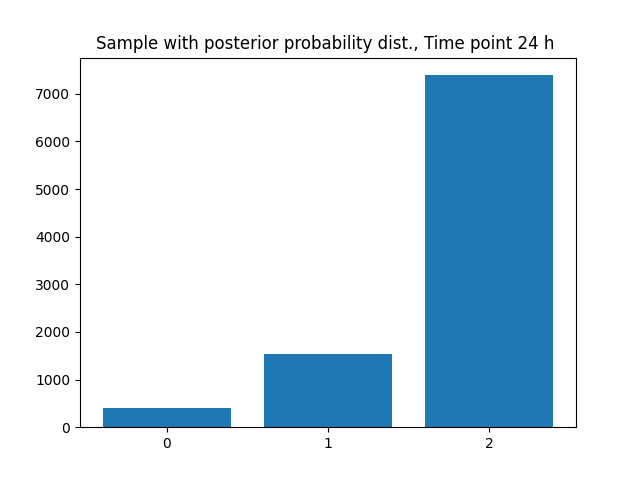

In [98]:
m = 3
hour = '24'
sufx = ''

means,Cs,ws = gmm.runGM(hour,dim,m,dfTh,res0,sufx,outf=True,show=False,cond=False,xlabel=xlabel,ylabel=ylabel,zlabel=zlabel)
plt.show()

dfW = dfTh.copy()

for k in range(m):
    dfW.loc[:,'w'+str(k)] = ws[k]

In [99]:
dfW

,log V450-A,ssca,fsca,gate,w0,w1,w2
0,12.646259,23023.439453,68780.039062,None,1.613935e-07,1.097056e-07,9.999997e-01
1,13.935247,47530.558594,133598.125000,None,1.971018e-02,9.185146e-01,6.177523e-02
2,13.466461,36447.839844,114792.500000,None,4.549618e-04,3.181412e-02,9.677309e-01
3,13.371036,38932.960938,121767.000000,None,1.472016e-04,8.516336e-03,9.913365e-01
4,13.000393,45587.519531,116047.539062,None,2.958217e-06,3.423783e-05,9.999628e-01
...,...,...,...,...,...,...,...
9673,13.138224,32327.679688,96151.164062,None,1.143174e-05,2.830812e-04,9.997055e-01
9674,14.993010,59817.121094,134933.828125,None,9.947034e-01,5.296629e-03,6.742046e-09
9675,13.235688,36109.917969,103223.343750,None,3.200705e-05,1.208612e-03,9.987594e-01
9676,13.071326,49158.558594,115189.882812,None,5.841247e-06,1.024225e-04,9.998917e-01
